In [1]:
from keras.datasets import imdb

In [2]:
# top 10,000 most fre- quently occurring words in the training data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [10]:
print(type(train_data), len(train_data), train_data.shape)
print(train_data[0])
print(type(train_data[0]))
print(train_labels[0])
print(type(train_labels[0]))

<class 'numpy.ndarray'> 25000 (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
<class 'list'>
1
<cla

In [11]:
word_index = imdb.get_word_index()

# reverse key,value where key word and value is index
reverse_list = [(value, key) for (key, value) in word_index.items()]

# dict key is index and value is the word
reverse_word_index = dict(reverse_list)

1641221/1641221 [==============================] - 0s 0us/step


In [12]:
# Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.
l = [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
l

['?',
 'this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 '?',
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 '?',
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 '?',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',
 'end',
 'it',

In [14]:
decoded_review = ' '.join(l)
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
# Preparing the data
# You can’t feed lists of integers into a neural network. You have to turn your lists into tensors
# One-hot encode your lists to turn them into vectors of 0s and 1s. 
# This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5,
# which would be 1s.
# Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

In [16]:
import numpy as np

# dimension 10000, one dimension per word
def vectorize_sequences(sequences, dimension=10000):
    # Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s. sequence holds a list of indexes
        results[i, sequence] = 1.
    return results

# Vectorized training data
x_train = vectorize_sequences(train_data)

# Vectorized test data
x_test = vectorize_sequences(test_data)

In [18]:
print(x_train[0])
print(x_train.shape)

[0. 1. 1. ... 0. 0. 0.]
(25000, 10000)


In [19]:
# You should also vectorize your labels, which is straightforward:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [20]:
print(y_train[0])
print(y_train.shape)

1.0
(25000,)


In [ ]:
# Building your network
# The input data is vectors, and the labels are scalars (1s and 0s): this is the easiest setup you’ll ever encounter. 

In [21]:
from keras import models
from keras import layers

# build the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
# compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
# Setting aside a validation set
# In order to monitor during training the accuracy of the model on data it has never seen before, 
# you’ll create a validation set by setting apart 10,000 samples from the original training data.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
# Training your model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5252 - accuracy: 0.7832 - val_loss: 0.4095 - val_accuracy: 0.8482
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3179 - accuracy: 0.9011 - val_loss: 0.3149 - val_accuracy: 0.8851
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2291 - accuracy: 0.9271 - val_loss: 0.2824 - val_accuracy: 0.8902
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1822 - accuracy: 0.9415 - val_loss: 0.2839 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1465 - accuracy: 0.9540 - val_loss: 0.2938 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1196 - accuracy: 0.9627 - val_loss: 0.2976 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0991 - accuracy: 0.9700 - val_loss: 0.3085 - val_accuracy: 0.8849
Epoch 8/20
30/30 [=

In [27]:
# See the history
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

print(type(history_dict))

<class 'dict'>


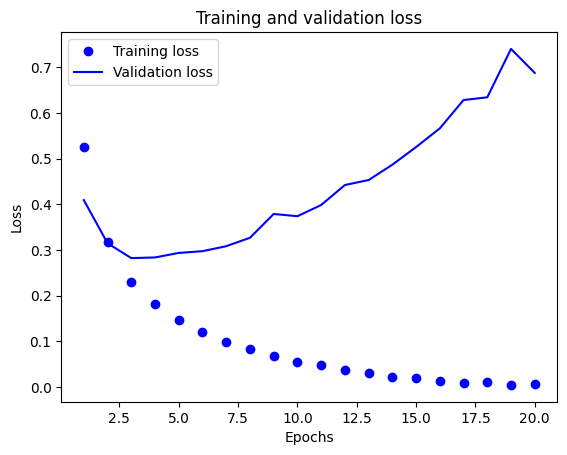

In [30]:
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

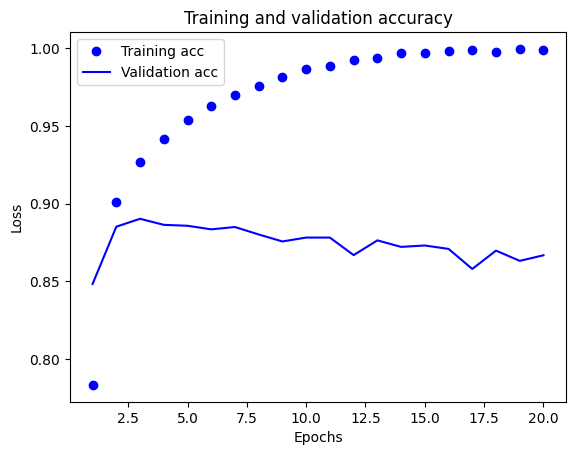

In [34]:
# Plotting the training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
# Evaluate model
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 0s 487us/step - loss: 0.7496 - accuracy: 0.8512
[0.7495790123939514, 0.8511999845504761]


In [37]:
# Predict
predictions = model.predict(x_test)

782/782 [==============================] - 0s 416us/step


In [39]:
print(type(predictions), predictions)

<class 'numpy.ndarray'> [[0.00921129]
 [1.        ]
 [0.9743688 ]
 ...
 [0.00453234]
 [0.00759613]
 [0.74270403]]
